# Oscillator Drift Prediction over Time

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import ipywidgets as widgets
from IPython.display import display

#### Path to current folder

In [2]:
path = "C:\\Users\\Ryan\\code\\freq-vs-age-prediction\\images"

### Variable Declarations
Click [here](file:///C:/Users/Ryan/AppData/Local/Microsoft/Windows/INetCache/Content.Outlook/LABZJESX/Crystal-Oscillator-Aging%20IsoTemp%20Paper.pdf) for Isotemp reference.

In [3]:
f  = 0    # Crystal oscillator frequency
t  = 0    # Time
t1 = 0    # Cooking/pre-aging period
t2 = 0    # Operating period
f1 = 0    # Corresponding frequency
K  = 0    # Aging slope

### Import and Preview Drift Data

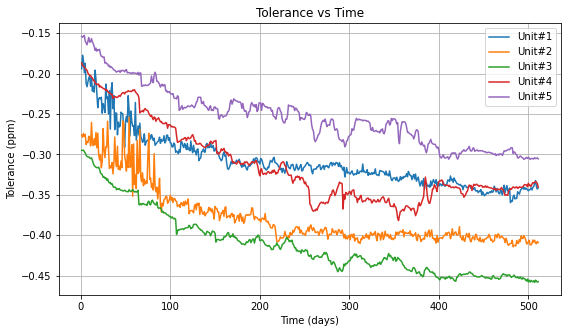

,Unit#1,Unit#2,Unit#3,Unit#4,Unit#5
count,511.000000,511.000000,511.000000,511.000000,511.000000
mean,-0.308572,-0.377096,-0.410977,-0.312781,-0.253588
std,0.034076,0.037121,0.040479,0.048028,0.037553
min,-0.359700,-0.414300,-0.458400,-0.381800,-0.306100
25%,-0.331950,-0.402250,-0.445350,-0.347650,-0.287050
50%,-0.315900,-0.395400,-0.422600,-0.334200,-0.256300
75%,-0.293500,-0.365800,-0.392950,-0.283650,-0.236000
max,-0.177300,-0.254100,-0.294800,-0.186800,-0.152700


In [4]:
df = pd.read_csv('XTALTQ_BT0f03_Aging_Data.csv')
df = df.set_index('Day')
plt.figure(figsize=(9, 5))
plt.plot(df)
plt.title("Tolerance vs Time")
plt.ylabel("Tolerance (ppm)")
plt.xlabel("Time (days)")
plt.grid(True)
plt.legend(df.columns)
# plt.savefig(f"{path}\\Tolerance-vs-Vc.png")
plt.show()
df.describe()

### Aging Prediction Calculations

$K = \frac { f(t_2) - f(t_1) }{ ln(t_2 / t_1) }$  
$f(t) = K*ln(\frac {t}{t1}) + f_1$

Unit#1   -0.035360
Unit#2   -0.037674
Unit#3   -0.042699
Unit#4   -0.038253
Unit#5   -0.038923
dtype: float64
-0.04269945405171033
-0.038252863258878875
-0.038922897487935676


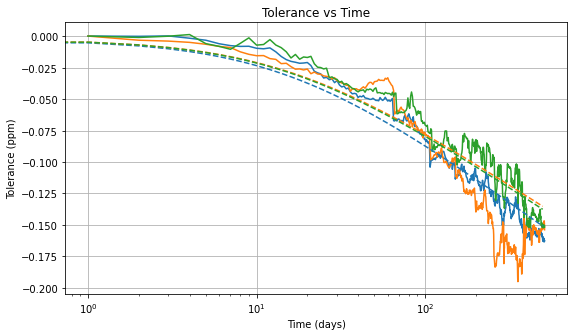

,Unit#1,Unit#2,Unit#3,Unit#4,Unit#5
count,511.000000,511.000000,511.000000,511.000000,511.000000
mean,-0.308572,-0.377096,-0.410977,-0.312781,-0.253588
std,0.034076,0.037121,0.040479,0.048028,0.037553
min,-0.359700,-0.414300,-0.458400,-0.381800,-0.306100
25%,-0.331950,-0.402250,-0.445350,-0.347650,-0.287050
50%,-0.315900,-0.395400,-0.422600,-0.334200,-0.256300
75%,-0.293500,-0.365800,-0.392950,-0.283650,-0.236000
max,-0.177300,-0.254100,-0.294800,-0.186800,-0.152700


In [7]:
t1 = 15
t2 = 400
t  = np.arange(1,500)
f_prediction = pd.DataFrame({})
choice_parts = [2,3,4]

K = ( df.loc[t2] - df.loc[t1] ) / np.log( t2 / t1 )
print(K)
print(K[choice_parts[0]])
print(K[choice_parts[1]])
print(K[choice_parts[2]])
f_prediction['Unit#1 Prediction'] = K[choice_parts[0]] * np.log( (t / t1) + 1 )
f_prediction['Unit#2 Prediction'] = K[choice_parts[1]] * np.log( (t / t1) + 1 )
f_prediction['Unit#3 Prediction'] = K[choice_parts[2]] * np.log( (t / t1) + 1 )
df_normal = df - df.loc[1]

plt.figure(figsize=(9, 5))
plt.plot(df_normal.iloc[:, choice_parts])
plt.gca().set_prop_cycle(None)
plt.plot(f_prediction, '--')
plt.title("Tolerance vs Time")
plt.ylabel("Tolerance (ppm)")
plt.xlabel("Time (days)")
plt.grid(True)
plt.xscale('log')
# plt.legend(['Unit#1', 'Unit#2', 'Unit#3', 'Unit#1 Prediction', 'Unit#2 Prediction', 'Unit#3 Prediction'])
plt.savefig(f"{path}\\{t.min()}_{t.max()}.png")
plt.show()
df.describe()

### Aging Prediction Over time intervals

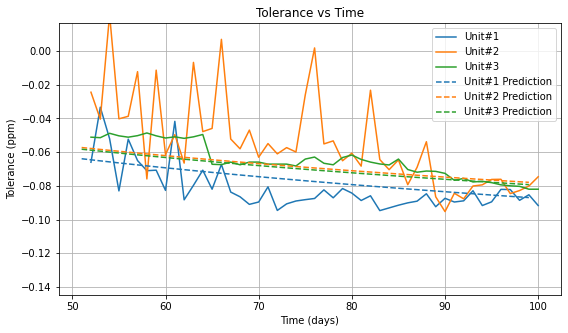

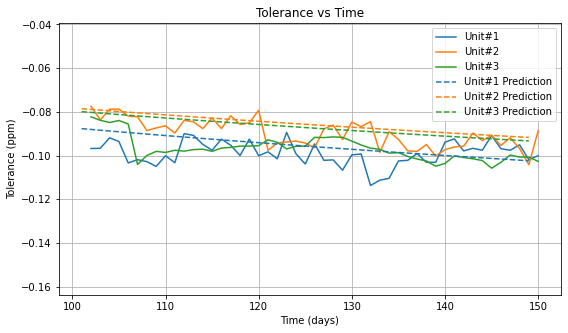

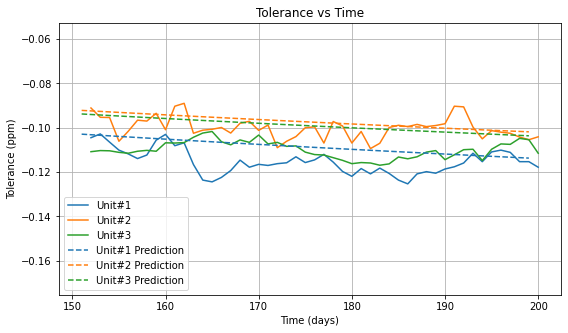

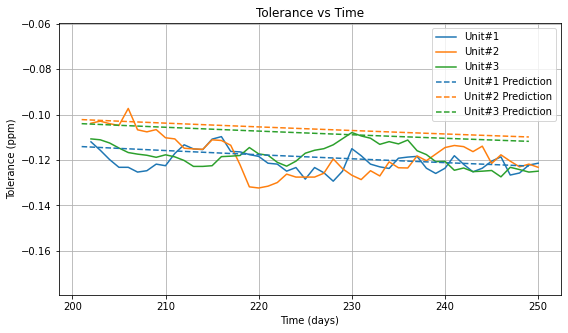

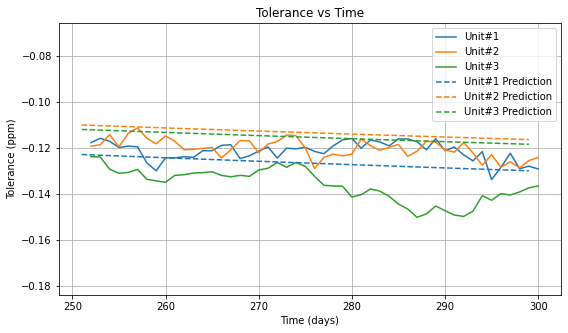

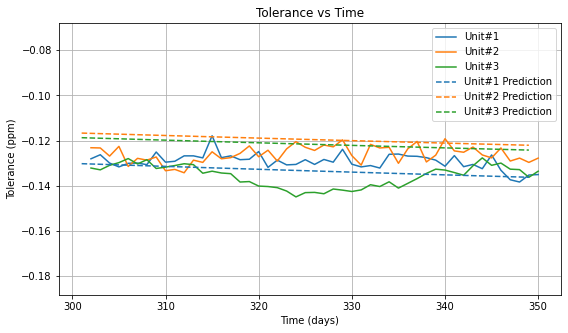

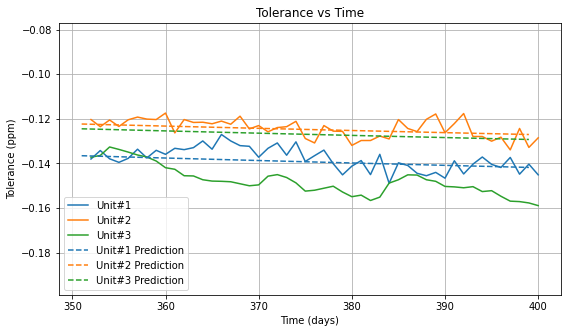

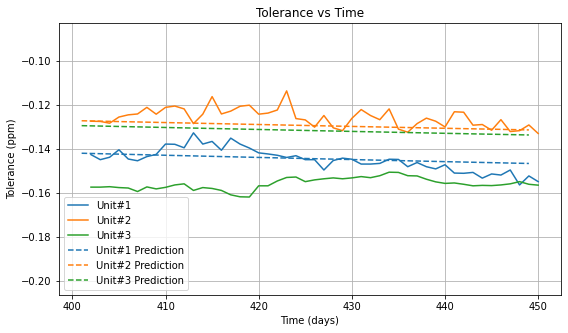

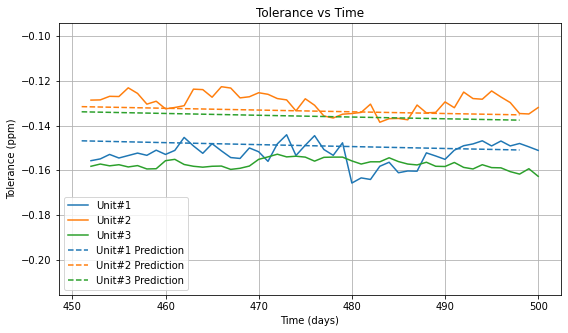

In [6]:
import os.path
for i in range(1,10):
    interval_start = 1+50*i
    interval_end = 50+50*i

    plt.figure(figsize=(9, 5))
    plt.plot(df_normal[['Unit#1', 'Unit#2', 'Unit#3']].iloc[interval_start:interval_end])
    plt.gca().set_prop_cycle(None)
    plt.plot(f_prediction.iloc[interval_start:interval_end], '--')
    plt.title("Tolerance vs Time")
    plt.ylabel("Tolerance (ppm)")
    plt.xlabel("Time (days)")
    plt.ylim((df_normal['Unit#1'][interval_start:interval_end].min()-.05, df_normal['Unit#1'][interval_start:interval_end].max()+0.05))
    plt.grid(True)
    # plt.xscale('log')
    plt.legend(['Unit#1', 'Unit#2', 'Unit#3', 'Unit#1 Prediction', 'Unit#2 Prediction', 'Unit#3 Prediction'])
    plt.savefig(f"{path}\\{interval_start}_{interval_end}.png")
    plt.show()
    df.describe()